# Global Annual Carbon Emissions

In [1]:
# importing the necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Reading the Data

In [2]:
# reading and loading the datasets

df_main=pd.read_csv('annual-co-emissions-by-region.csv')     # global emissions data
world_data=pd.read_csv('CountryContinent.csv')               # country and continents dataset

In [3]:
print(f'There are {df_main.shape[0]} rows and {df_main.shape[1]} columns')

There are 30308 rows and 4 columns


In [4]:
print(f'The variables are {", ".join(df_main.columns)}')

The variables are Entity, Code, Year, Annual CO₂ emissions


In [5]:
df_main.head()

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


### Data Preparation and Cleaning

In [6]:
# renaming the CO2 emissions column because of the subscript

df_main.rename(columns={'Annual CO₂ emissions':'Emissions'}, inplace=True)

In [7]:
df_main.describe()      # summarizing the data

,Year,Emissions
count,30308.000000,3.030800e+04
mean,1940.191336,3.912722e+08
std,65.510232,1.855825e+09
min,1750.000000,0.000000e+00
25%,1902.000000,1.832000e+05
50%,1959.000000,3.856092e+06
75%,1991.000000,4.727752e+07
max,2022.000000,3.714979e+10


In [8]:
df_main.info()   # counting the non-empty rows of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30308 entries, 0 to 30307
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Entity     30308 non-null  object 
 1   Code       24157 non-null  object 
 2   Year       30308 non-null  int64  
 3   Emissions  30308 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 947.3+ KB


In [9]:
print(f' There are {df_main["Code"].isnull().sum()} nulls in the "Code" column')

 There are 6151 nulls in the "Code" column


# Global

### preparing global dataframe

In [10]:
df_world=df_main[df_main['Entity']=='World']        # filtering for world rows
df_world['Increase']=df_world.groupby('Entity')['Emissions'].diff()      # calculating increase and decrease in emissions
df_world.dropna(subset='Increase',inplace=True)       # removing the null values
df_world.drop(columns='Code',inplace=True)  

In [11]:
# locating highest increase and decrease in emissions
world_top_bot=df_world.sort_values('Increase').iloc[[0,-1]]
world_top_bot

,Entity,Year,Emissions,Increase
30039,World,2020,3.500774e+10,-2.032365e+09
30029,World,2010,3.330633e+10,1.813065e+09


### global visualizations

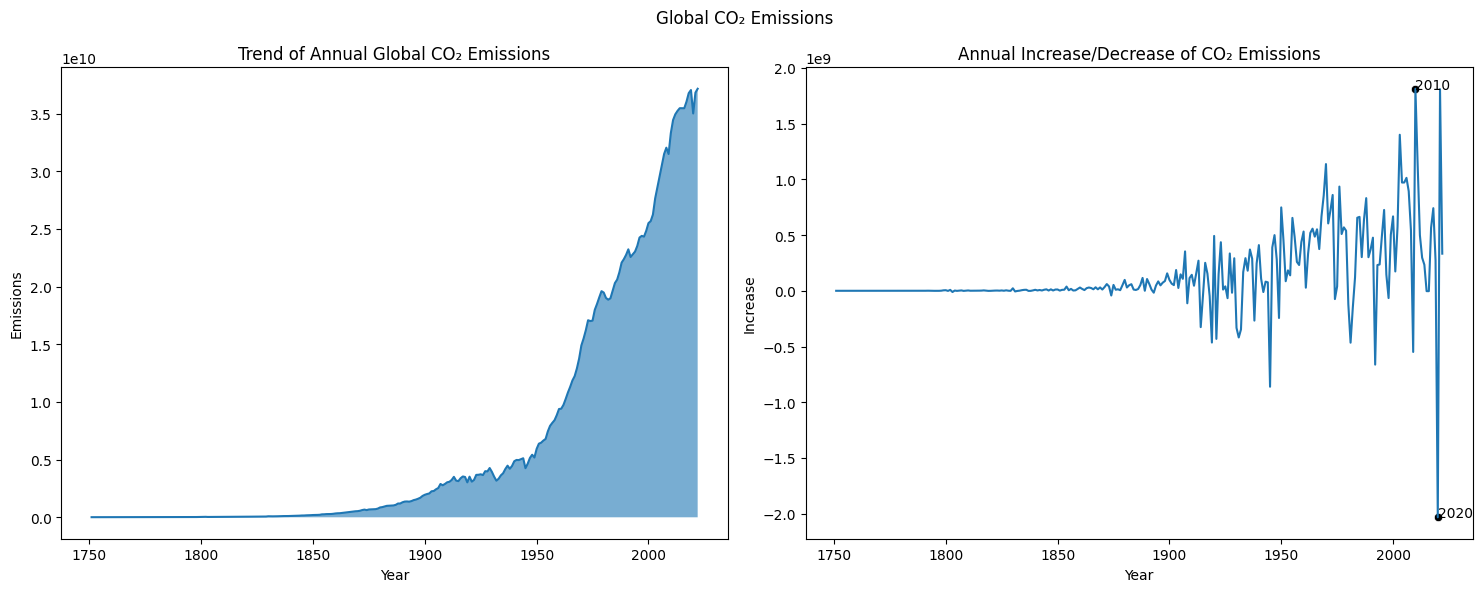

In [12]:
plt.figure(figsize=(15,6))
plt.suptitle('Global CO₂ Emissions')

plt.subplot(1,2,1)
plt.title('Trend of Annual Global CO₂ Emissions')
sns.lineplot(df_world,x='Year',y='Emissions')
for line in plt.gca().lines:
    plt.fill_between(line.get_xdata(),line.get_ydata(), alpha=0.6)

plt.subplot(1,2,2)
plt.title('Annual Increase/Decrease of CO₂ Emissions')
sns.lineplot(df_world,x='Year',y='Increase')
sns.scatterplot(world_top_bot,x='Year',y='Increase',color='black')
for x,y,label in zip(world_top_bot['Year'],world_top_bot['Increase'],world_top_bot['Year']):
    plt.annotate(label,(x,y),textcoords='offset points',xytext=(0,0))

plt.tight_layout()
plt.show()

# Continental

### preparing continenal dataframe

In [13]:
continents=['Africa','Antarctica','Asia','Europe','North America','Oceania','South America']
df_continents=df_main[df_main['Entity'].isin(continents)]              # matching rows from df_main that the Entity matches continent in continents

In [14]:
df_continents['Increase']=df_continents.groupby('Entity')['Emissions'].diff()
df_continents.drop(columns='Code',inplace=True)
df_continents.dropna(subset='Increase',inplace=True);

In [15]:
df_continents

,Entity,Year,Emissions,Increase
75,Africa,1751,0.000000e+00,0.0
76,Africa,1752,0.000000e+00,0.0
77,Africa,1753,0.000000e+00,0.0
78,Africa,1754,0.000000e+00,0.0
79,Africa,1755,0.000000e+00,0.0
...,...,...,...,...
25400,South America,2018,1.067226e+09,-66487100.0
25401,South America,2019,1.067116e+09,-109900.0
25402,South America,2020,9.614003e+08,-105715900.0
25403,South America,2021,1.085906e+09,124506100.0


### continental visualizations

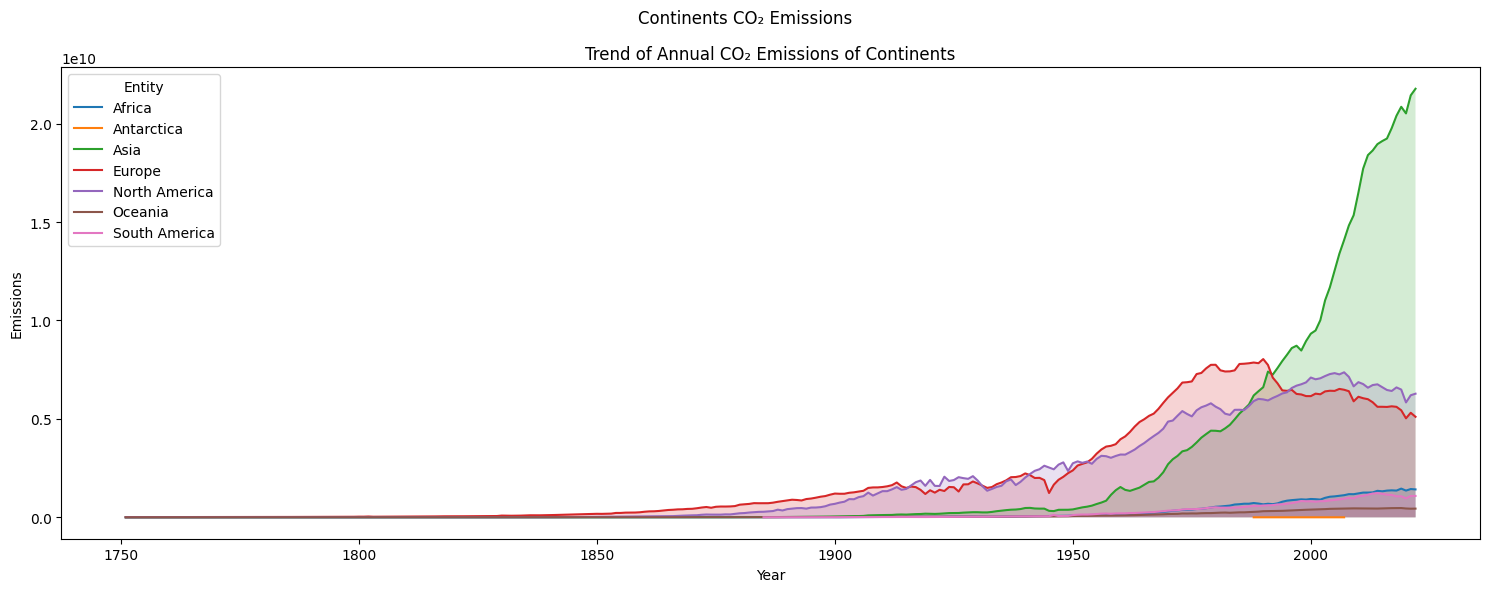

In [16]:
plt.figure(figsize=(15,6))
plt.suptitle('Continents CO₂ Emissions')

plt.title('Trend of Annual CO₂ Emissions of Continents')
sns.lineplot(df_continents,x='Year',y='Emissions',hue='Entity')
for line in plt.gca().lines:
    plt.fill_between(line.get_xdata(), line.get_ydata(), alpha=0.2)

plt.tight_layout()
plt.show()

# Most and Least Nations

### preparing national dataframes

In [17]:
# let us create a dataframe of national emissions 

df_country=df_main[~df_main['Code'].isnull() & (df_main['Entity']!='World') & (df_main['Entity']!='Antarctica')]    # filtering for when code is not null and entity is neither World nor antartica

In [18]:
# merging country dataframe with the dataset of country_continents to know the continents of each country

df=df_country.merge(world_data,how='inner',left_on='Entity',right_on='Country')
df.drop(columns=['Code','Country'],inplace=True)

In [19]:
max5=df.groupby('Entity')['Emissions'].sum().nlargest(5).index   # getting the list of the countries with the most emissions
min5=df.groupby('Entity')['Emissions'].sum().nsmallest(5).index  # getting the list of the countries with the least emissions

df_max5=df[df['Entity'].isin(max5)]                      # getiing the dataframe of the highest countries
df_min5=df[df['Entity'].isin(min5)]                      # getiing the dataframe of the least countries

### country visualizations

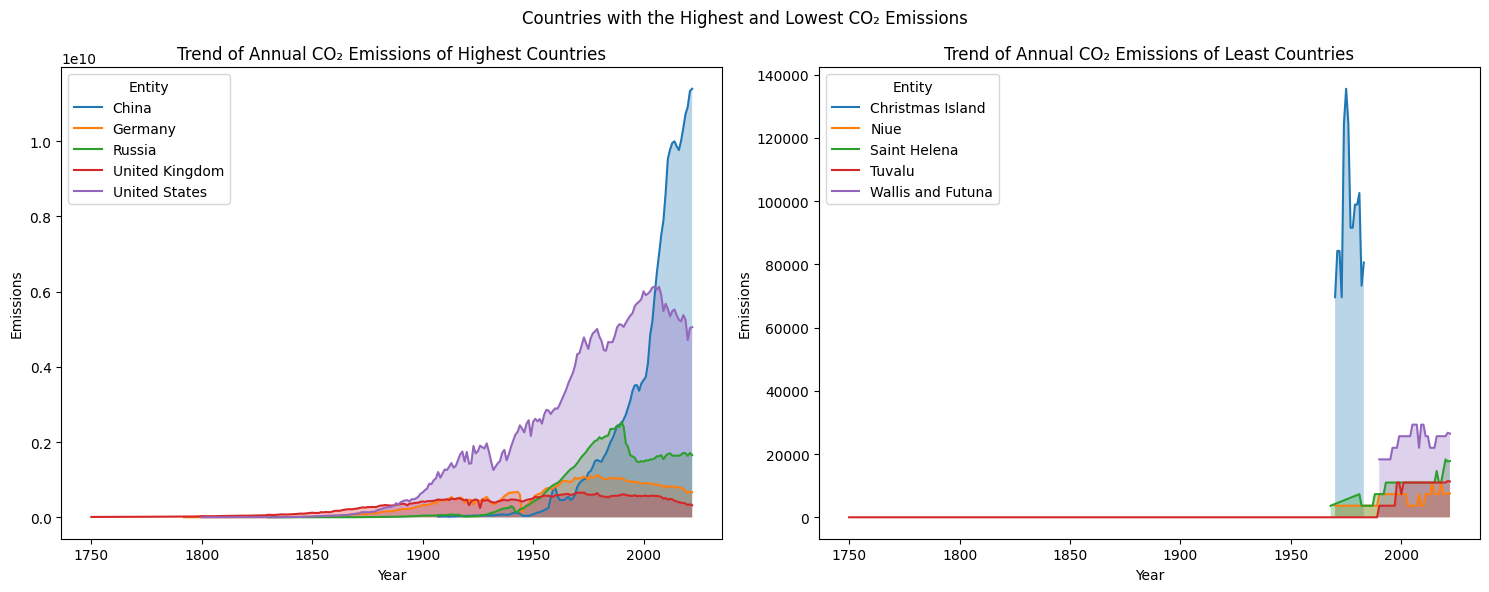

In [20]:
plt.figure(figsize=(15,6))
plt.suptitle('Countries with the Highest and Lowest CO₂ Emissions')

plt.subplot(1,2,1)
plt.title('Trend of Annual CO₂ Emissions of Highest Countries')
sns.lineplot(df_max5,x='Year',y='Emissions',hue='Entity')
for line in plt.gca().lines:
    plt.fill_between(line.get_xdata(), line.get_ydata(), alpha=0.3)

plt.subplot(1,2,2)
plt.title('Trend of Annual CO₂ Emissions of Least Countries')
sns.lineplot(df_min5,x='Year',y='Emissions',hue='Entity')
for line in plt.gca().lines:
    plt.fill_between(line.get_xdata(), line.get_ydata(), alpha=0.3)

plt.tight_layout()
plt.show()

## Africa

### preparing african dataframes

In [21]:
df_Africa=df_continents[df_continents['Entity']=='Africa']
AF_top_bot = df_Africa.sort_values('Increase').iloc[[0,-1]]

In [22]:
df_African=df[df['Continent']=='Africa']
AfriMax5= df_African.groupby('Entity')['Emissions'].sum().nlargest(5).index
AfriMin5= df_African.groupby('Entity')['Emissions'].sum().nsmallest(5).index

df_AfriMax5=df_African[df_African['Entity'].isin(AfriMax5)]
df_AfriMin5=df_African[df_African['Entity'].isin(AfriMin5)]

### african visualizations

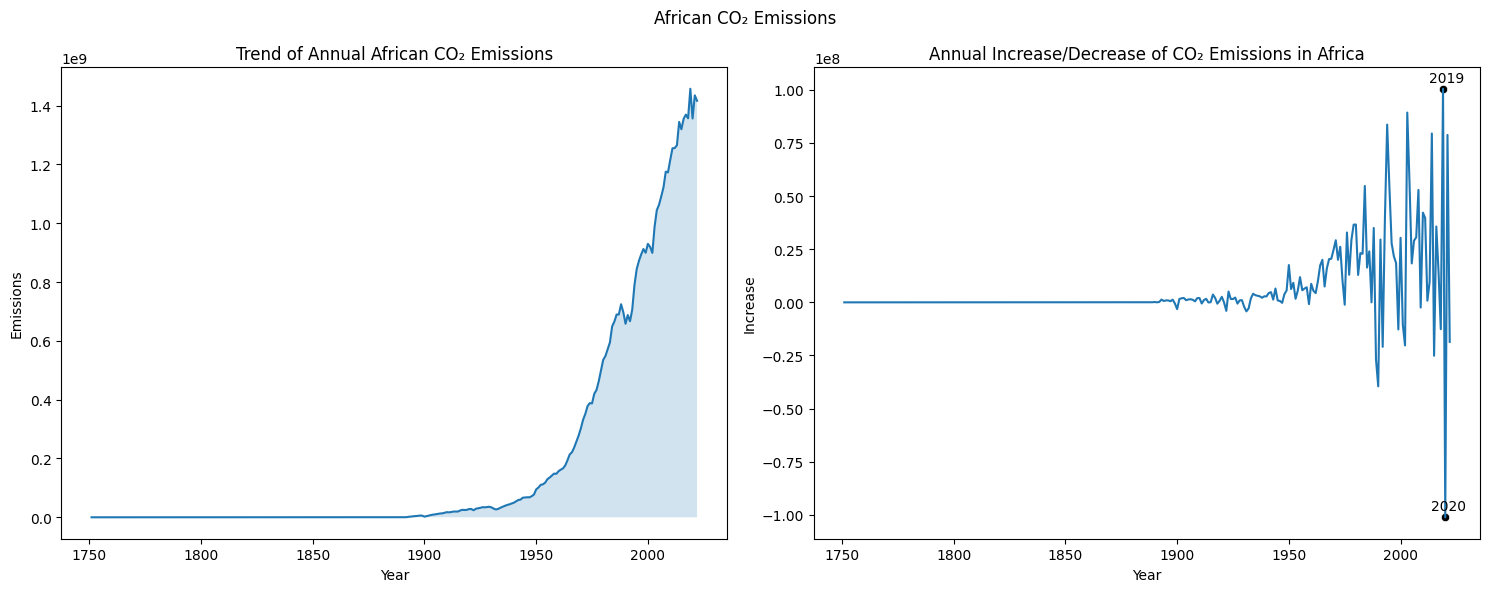

In [23]:
plt.figure(figsize=(15,6))
plt.suptitle('African CO₂ Emissions')

plt.subplot(1,2,1)
plt.title('Trend of Annual African CO₂ Emissions')
sns.lineplot(df_Africa,x='Year',y='Emissions')
for line in plt.gca().lines:
    plt.fill_between(line.get_xdata(),line.get_ydata(),alpha=0.2)


plt.subplot(1,2,2)
plt.title('Annual Increase/Decrease of CO₂ Emissions in Africa')
sns.lineplot(df_Africa,x='Year',y='Increase')
sns.scatterplot(AF_top_bot,x='Year',y='Increase',c='black')
for x,y,label in zip(AF_top_bot['Year'],AF_top_bot['Increase'],AF_top_bot['Year']):
    plt.annotate(label,(x,y),textcoords='offset points',xytext=(-10,5))

plt.tight_layout()
plt.show()

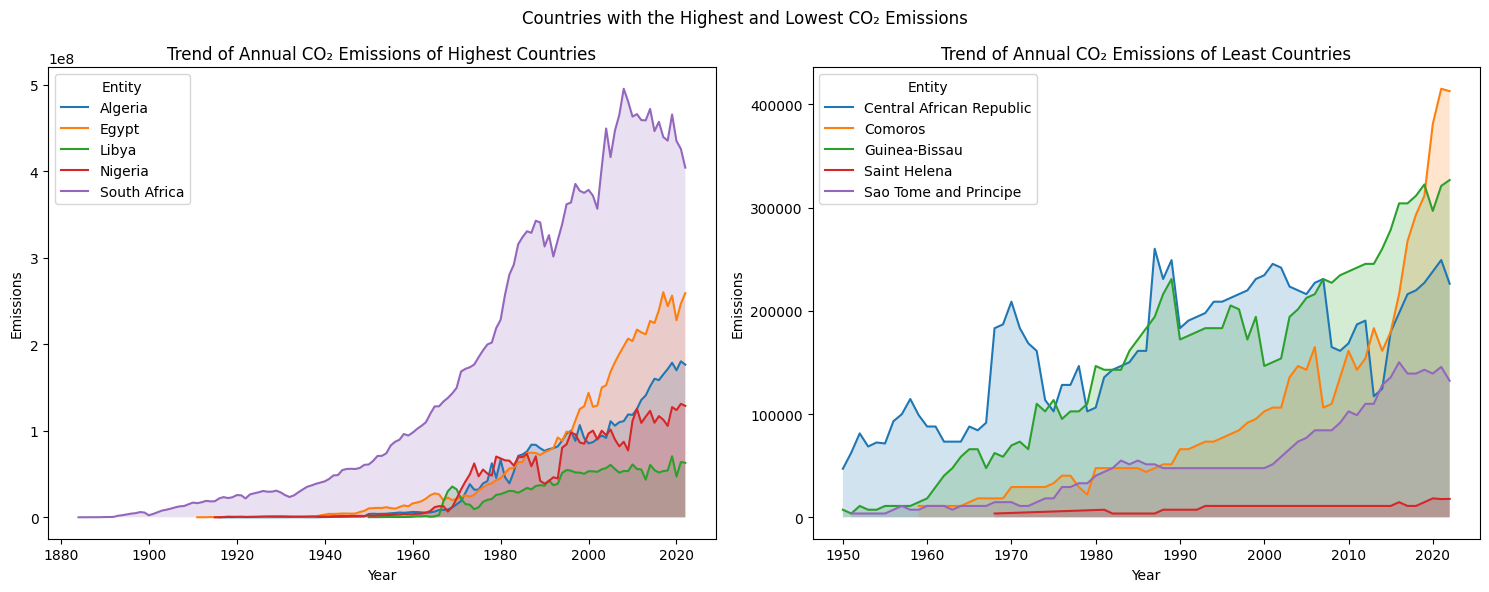

In [24]:
plt.figure(figsize=(15,6))
plt.suptitle('Countries with the Highest and Lowest CO₂ Emissions')

plt.subplot(1,2,1)
plt.title('Trend of Annual CO₂ Emissions of Highest Countries')
sns.lineplot(data=df_AfriMax5, x='Year', y='Emissions', hue='Entity')
for line in plt.gca().lines:
    plt.fill_between(line.get_xdata(), line.get_ydata(), alpha=0.2)

plt.subplot(1,2,2)
plt.title('Trend of Annual CO₂ Emissions of Least Countries')
sns.lineplot(data=df_AfriMin5, x='Year', y='Emissions', hue='Entity')
for line in plt.gca().lines:
    plt.fill_between(line.get_xdata(), line.get_ydata(), alpha=0.2)

plt.tight_layout()
plt.show()

## Asia

### preparing asian dataframes

In [25]:
df_Asia = df_continents[df_continents['Entity']=='Asia']
As_top_bot=df_Asia.sort_values('Increase').iloc[[0,-1]]

In [26]:
df_Asian=df[df['Continent']=='Asia']
AsianMax5=df_Asian.groupby('Entity')['Emissions'].sum().nlargest(5).index
AsianMin5=df_Asian.groupby('Entity')['Emissions'].sum().nsmallest(5).index

df_AsiaMax5=df_Asian[df_Asian['Entity'].isin(AsianMax5)]
df_AsiaMin5=df_Asian[df_Asian['Entity'].isin(AsianMin5)]

### asian visualizations

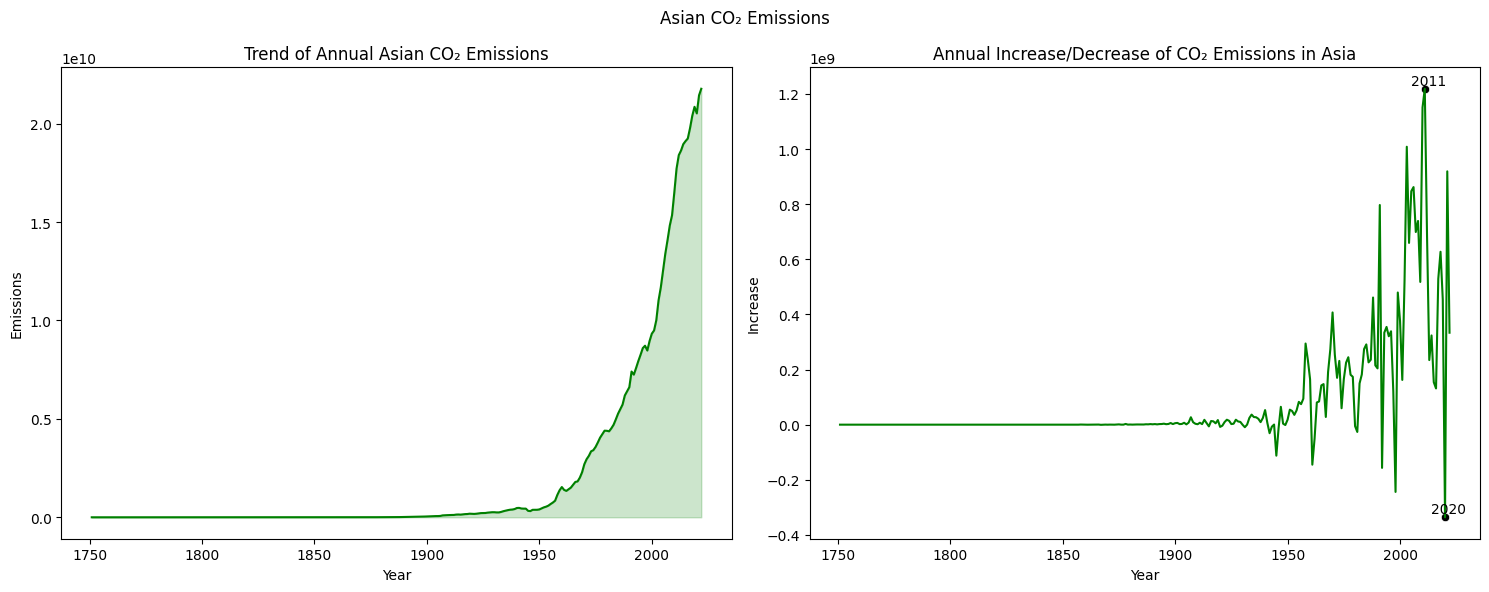

In [27]:
plt.figure(figsize=(15,6))
plt.suptitle('Asian CO₂ Emissions')

plt.subplot(1,2,1)
plt.title('Trend of Annual Asian CO₂ Emissions')
sns.lineplot(df_Asia,x='Year',y='Emissions',color='Green')
for line in plt.gca().lines:
    plt.fill_between(line.get_xdata(), line.get_ydata(), alpha=0.2, color='green')

plt.subplot(1,2,2)
plt.title('Annual Increase/Decrease of CO₂ Emissions in Asia')
sns.lineplot(df_Asia,x='Year',y='Increase',color='green')
sns.scatterplot(As_top_bot,x='Year',y='Increase',color='black')
for x,y,label in zip(As_top_bot['Year'],As_top_bot['Increase'],As_top_bot['Year']):
    plt.annotate(label,(x,y),textcoords='offset points',xytext=(-10,3))

plt.tight_layout()
plt.show()

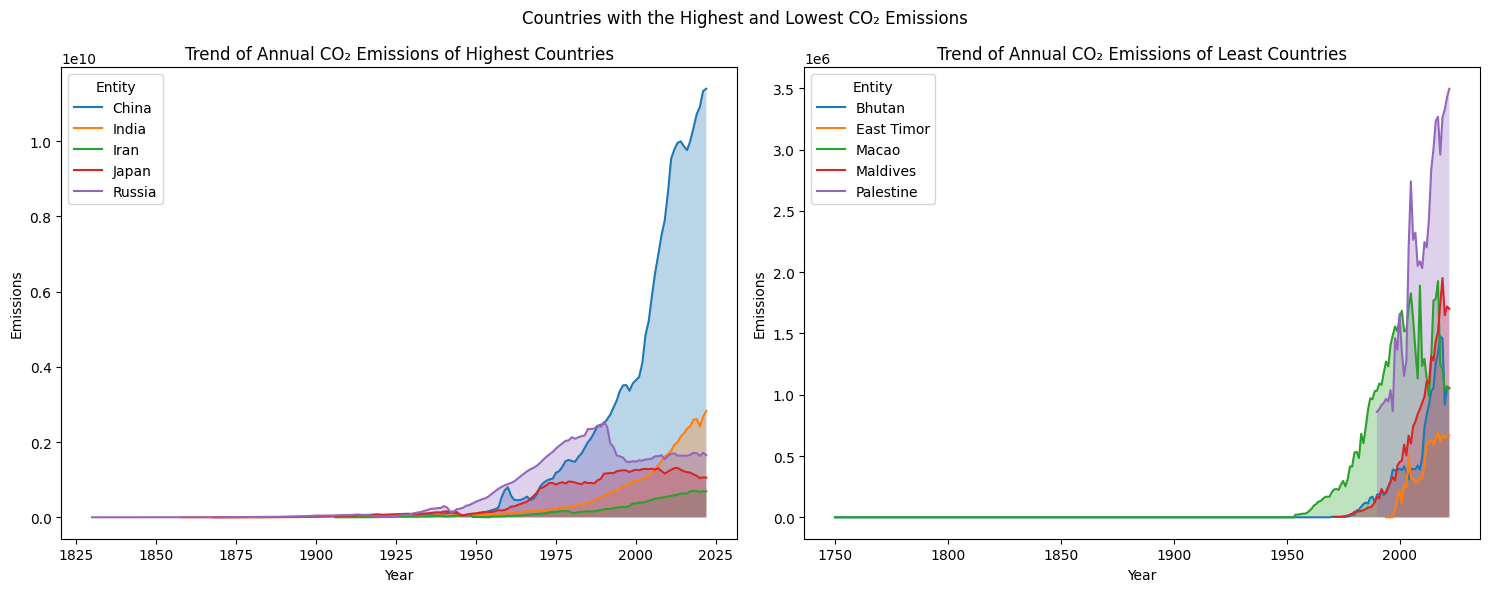

In [28]:
plt.figure(figsize=(15,6))
plt.suptitle('Countries with the Highest and Lowest CO₂ Emissions')

plt.subplot(1,2,1)
plt.title('Trend of Annual CO₂ Emissions of Highest Countries')
sns.lineplot(df_AsiaMax5,x='Year',y='Emissions',hue='Entity')
for line in plt.gca().lines:
    plt.fill_between(line.get_xdata(),line.get_ydata(),alpha=0.3)

plt.subplot(1,2,2)
plt.title('Trend of Annual CO₂ Emissions of Least Countries')
sns.lineplot(df_AsiaMin5,x='Year',y='Emissions',hue='Entity')
for line in plt.gca().lines:
    plt.fill_between(line.get_xdata(),line.get_ydata(),alpha=0.3)

plt.tight_layout()
plt.show()

## Europe

### preparing european dataframes

In [29]:
df_Europe=df_continents[df_continents['Entity']=='Europe']
Eu_top_bot=df_Europe.sort_values('Increase').iloc[[0,-1]]

In [30]:
df_European=df[df['Continent']=='Europe']
EuMax5=df_European.groupby('Entity')['Emissions'].sum().nlargest(5).index
EuMin5=df_European.groupby('Entity')['Emissions'].sum().nsmallest(5).index

df_Eur_Max5=df_European[df_European['Entity'].isin(EuMax5)]
df_Eur_Min5=df_European[df_European['Entity'].isin(EuMin5)]

### european visualizations

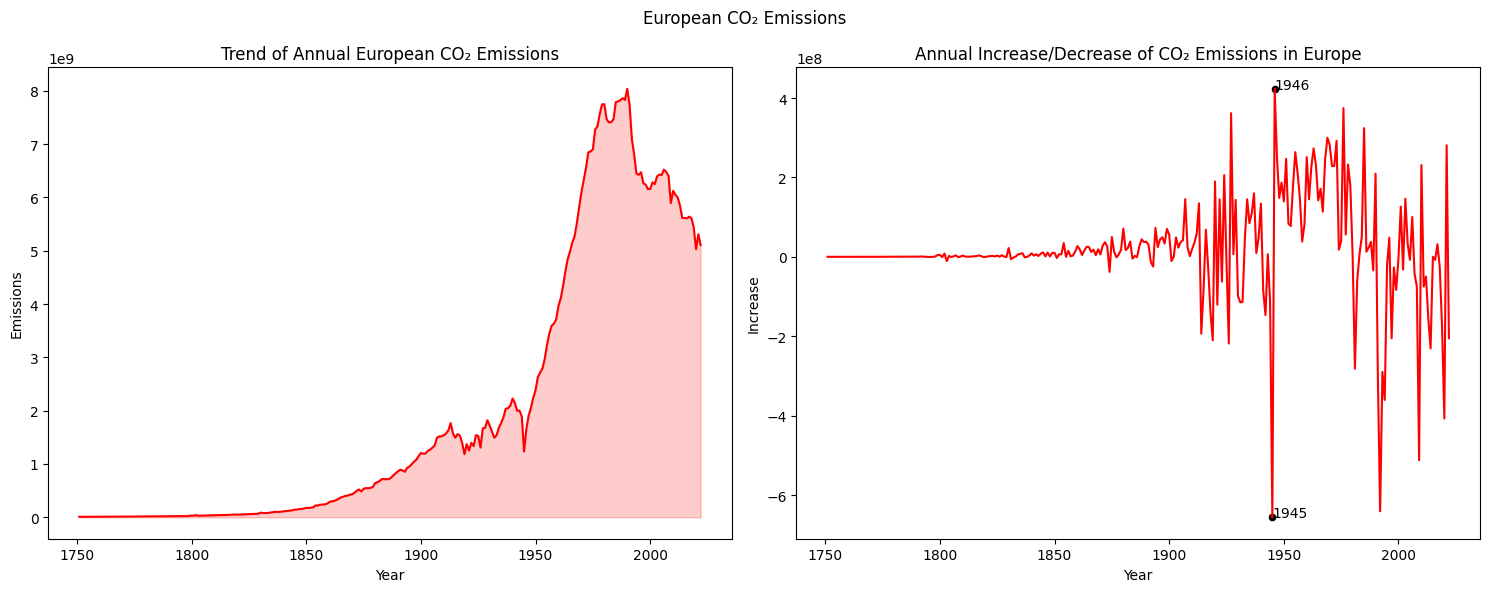

In [31]:
plt.figure(figsize=(15,6))
plt.suptitle('European CO₂ Emissions')

plt.subplot(1,2,1)
plt.title('Trend of Annual European CO₂ Emissions')
sns.lineplot(df_Europe,x='Year',y='Emissions',color='red')
for line in plt.gca().lines:
    plt.fill_between(line.get_xdata(),line.get_ydata(),alpha=0.2,color='red')

plt.subplot(1,2,2)
plt.title('Annual Increase/Decrease of CO₂ Emissions in Europe')
sns.lineplot(df_Europe,x='Year',y='Increase',color='red')
sns.scatterplot(Eu_top_bot,x='Year',y='Increase',color='black')
for x,y,label in zip(Eu_top_bot['Year'],Eu_top_bot['Increase'],Eu_top_bot['Year']):
    plt.annotate(label,(x,y),textcoords='offset points', xytext=(0,0))

plt.tight_layout()
plt.show()

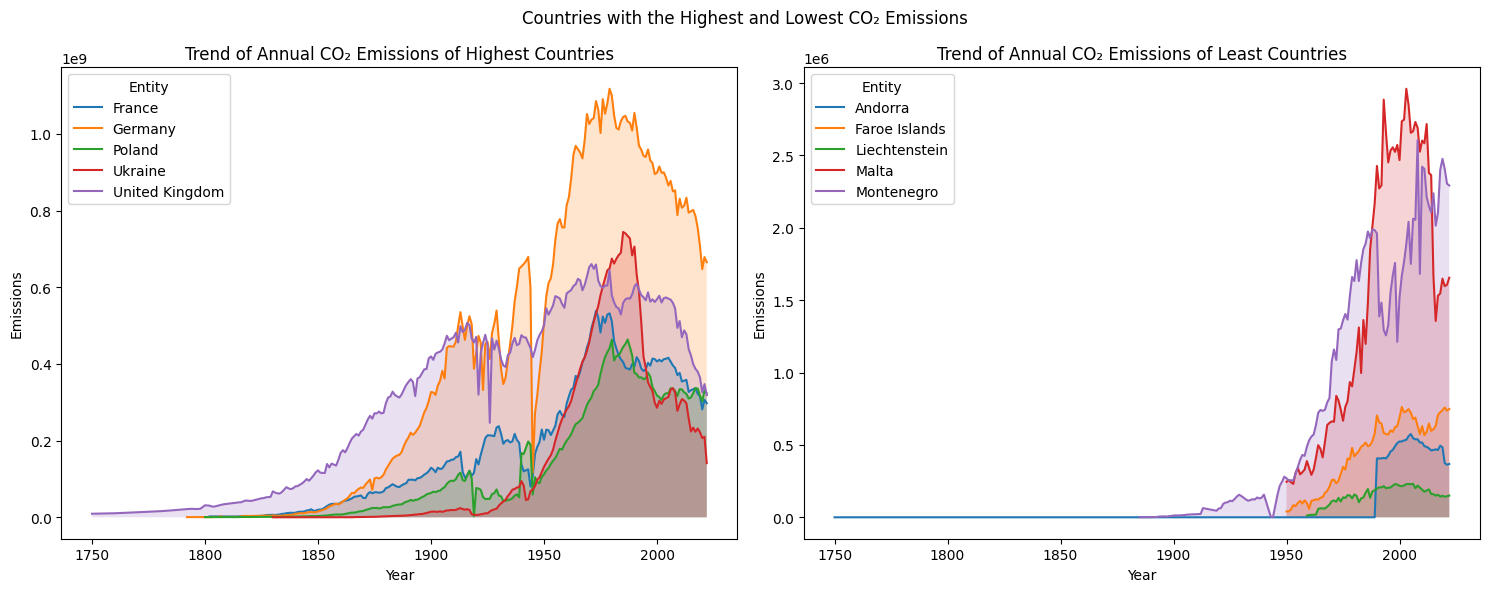

In [32]:
plt.figure(figsize=(15,6))
plt.suptitle('Countries with the Highest and Lowest CO₂ Emissions')

plt.subplot(1,2,1)
plt.title('Trend of Annual CO₂ Emissions of Highest Countries')
sns.lineplot(df_Eur_Max5,x='Year',y='Emissions',hue='Entity')
for line in plt.gca().lines:
    plt.fill_between(line.get_xdata(),line.get_ydata(),alpha=0.2)

plt.subplot(1,2,2)
plt.title('Trend of Annual CO₂ Emissions of Least Countries')
sns.lineplot(df_Eur_Min5,x='Year',y='Emissions',hue='Entity')
for line in plt.gca().lines:
    plt.fill_between(line.get_xdata(),line.get_ydata(),alpha=0.2)

plt.tight_layout()
plt.show()

## North America

### preparing north american dataframes

In [33]:
df_NA=df_continents[df_continents['Entity']=='North America']
NA_top_bot=df_NA.sort_values('Increase').iloc[[0,-1]]

In [34]:
df_NAns=df[df['Continent']=='North America']
NAMax5=df_NAns.groupby('Entity')['Emissions'].sum().nlargest(5).index
NAMin5=df_NAns.groupby('Entity')['Emissions'].sum().nsmallest(5).index

df_NAMax5=df_NAns[df_NAns['Entity'].isin(NAMax5)]
df_NAMin5=df_NAns[df_NAns['Entity'].isin(NAMin5)]

### north american visualizations

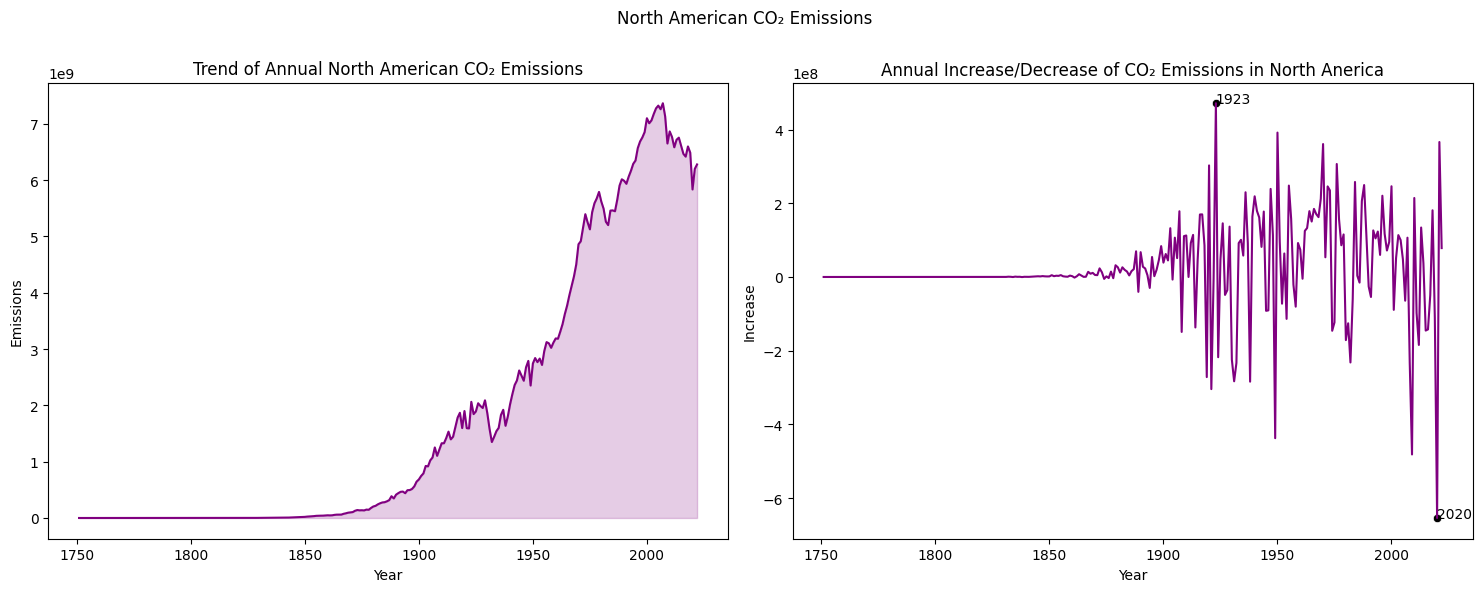

In [35]:
plt.figure(figsize=(15,6))
plt.suptitle('North American CO₂ Emissions')

plt.subplot(1,2,1)
plt.title('Trend of Annual North American CO₂ Emissions')
sns.lineplot(df_NA,x='Year',y='Emissions',color='purple')
for line in plt.gca().lines:
    plt.fill_between(line.get_xdata(),line.get_ydata(),alpha=0.2,color='purple')

plt.subplot(1,2,2)
plt.title('Annual Increase/Decrease of CO₂ Emissions in North Anerica')
sns.lineplot(df_NA,x='Year',y='Increase',color='purple')
sns.scatterplot(NA_top_bot,x='Year',y='Increase',color='black')
for x,y,label in zip(NA_top_bot['Year'],NA_top_bot['Increase'],NA_top_bot['Year']):
    plt.annotate(label,(x,y),textcoords='offset points', xytext=(0,0))

plt.tight_layout()
plt.show()

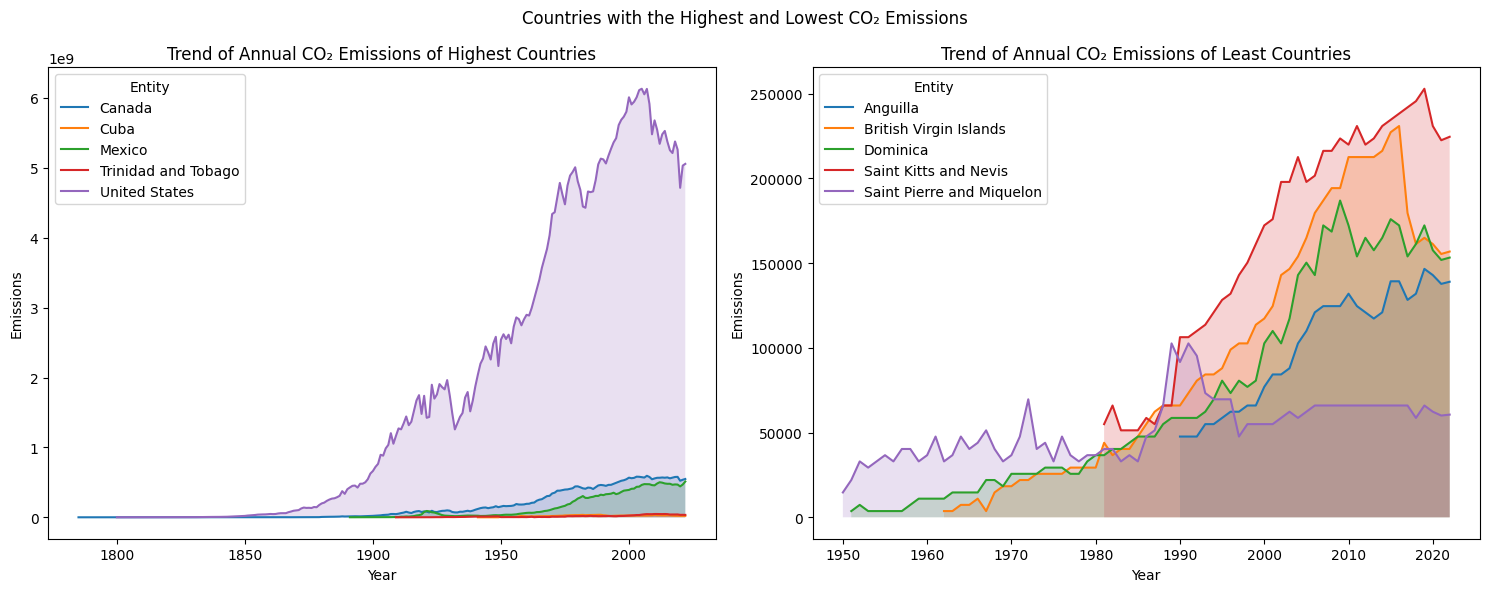

In [36]:
plt.figure(figsize=(15,6))
plt.suptitle('Countries with the Highest and Lowest CO₂ Emissions')

plt.subplot(1,2,1)
plt.title('Trend of Annual CO₂ Emissions of Highest Countries')
sns.lineplot(df_NAMax5,x='Year',y='Emissions',hue='Entity')
for line in plt.gca().lines:
    plt.fill_between(line.get_xdata(),line.get_ydata(),alpha=0.2)

plt.subplot(1,2,2)
plt.title('Trend of Annual CO₂ Emissions of Least Countries')
sns.lineplot(df_NAMin5,x='Year',y='Emissions',hue='Entity')
for line in plt.gca().lines:
    plt.fill_between(line.get_xdata(),line.get_ydata(),alpha=0.2)

plt.tight_layout()
plt.show()

## South America

### preparing south american dataframes

In [37]:
df_SA=df_continents[df_continents['Entity']=='South America']
SA_top_bot=df_SA.sort_values('Increase').iloc[[0,-1]]

In [38]:
df_SAns=df[df['Continent']=='South America']
SAnsMax5=df_SAns.groupby('Entity')['Emissions'].sum().nlargest(5).index
SAnsMin5=df_SAns.groupby('Entity')['Emissions'].sum().nsmallest(5).index

df_SAnsMax5=df_SAns[df_SAns['Entity'].isin(SAnsMax5)]
df_SAnsMin5=df_SAns[df_SAns['Entity'].isin(SAnsMin5)]

### south american visualizations

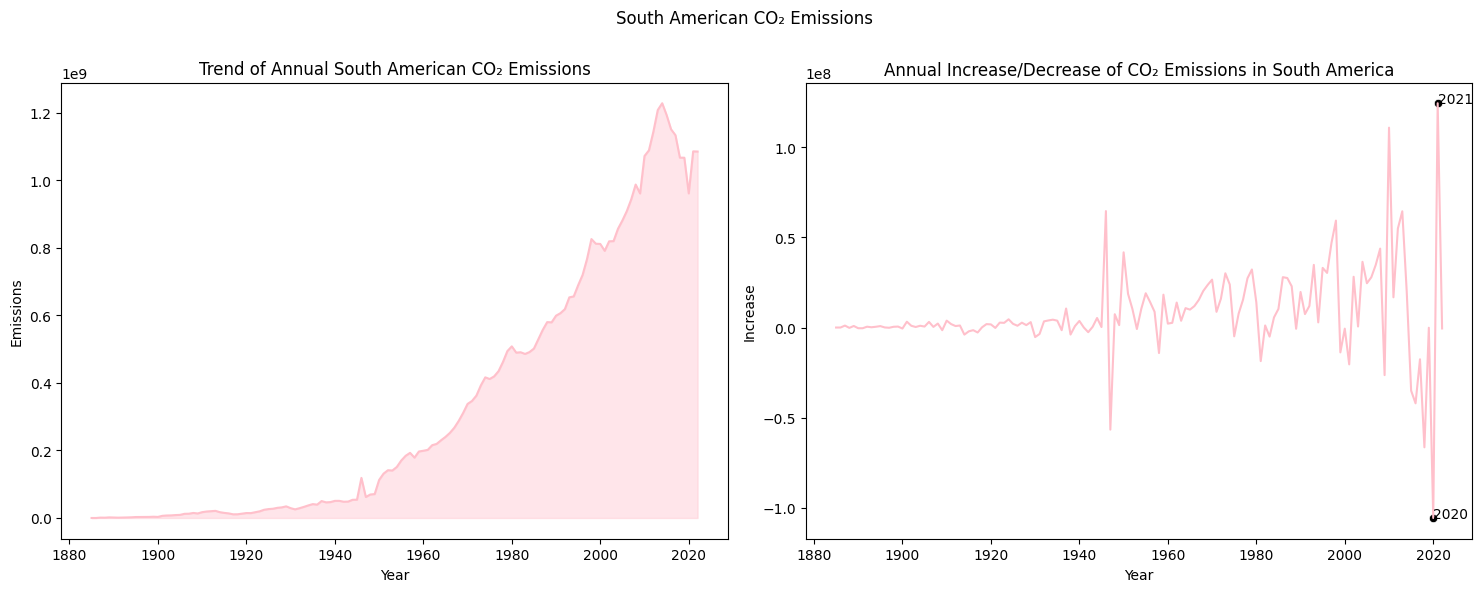

In [39]:
plt.figure(figsize=(15,6))
plt.suptitle('South American CO₂ Emissions')

plt.subplot(1,2,1)
plt.title('Trend of Annual South American CO₂ Emissions')
sns.lineplot(df_SA,x='Year',y='Emissions',color='pink')
for line in plt.gca().lines:
    plt.fill_between(line.get_xdata(),line.get_ydata(),alpha=0.4,color='pink')

plt.subplot(1,2,2)
plt.title('Annual Increase/Decrease of CO₂ Emissions in South America')
sns.lineplot(df_SA,x='Year',y='Increase',color='pink')
sns.scatterplot(SA_top_bot,x='Year',y='Increase', color='black')
for x,y,label in zip(SA_top_bot['Year'], SA_top_bot['Increase'], SA_top_bot['Year']):
    plt.annotate(label,(x,y),textcoords='offset points',xytext=(0,0))

plt.tight_layout()
plt.show()

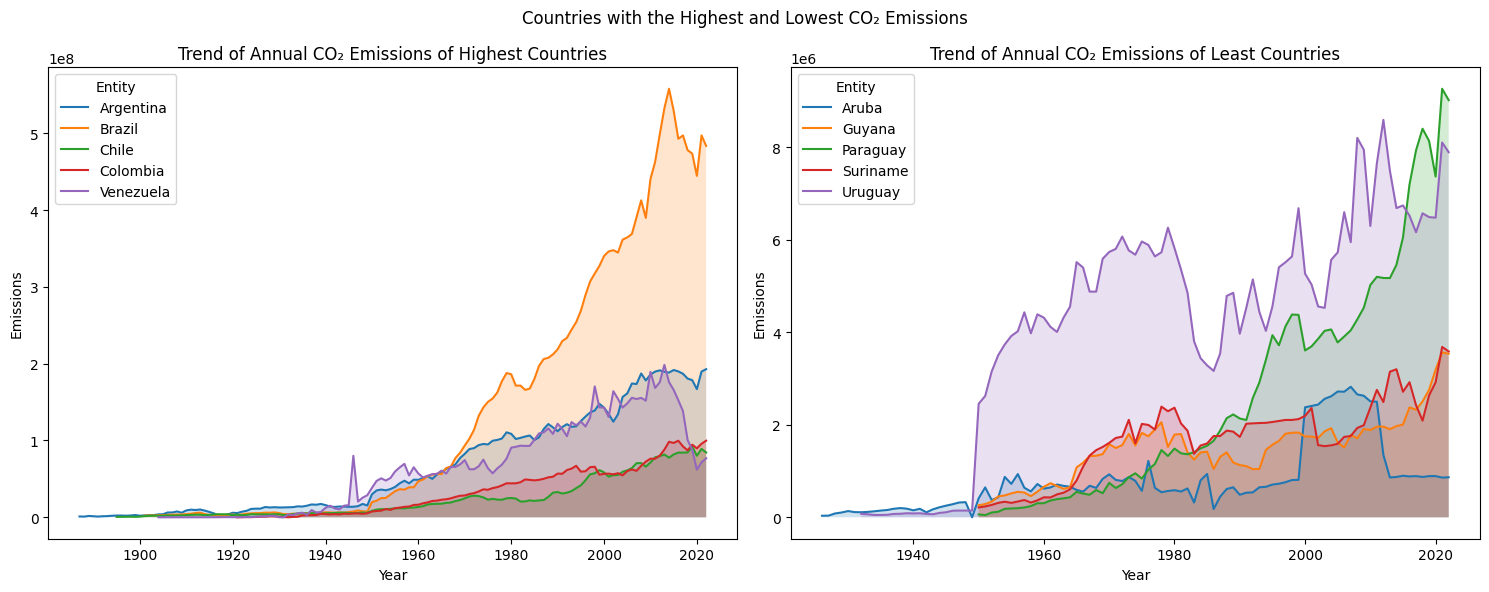

In [40]:
plt.figure(figsize=(15,6))
plt.suptitle('Countries with the Highest and Lowest CO₂ Emissions')

plt.subplot(1,2,1)
plt.title('Trend of Annual CO₂ Emissions of Highest Countries')
sns.lineplot(df_SAnsMax5,x='Year',y='Emissions',hue='Entity')
for line in plt.gca().lines:
    plt.fill_between(line.get_xdata(),line.get_ydata(),alpha=0.2)

plt.subplot(1,2,2)
plt.title('Trend of Annual CO₂ Emissions of Least Countries')
sns.lineplot(df_SAnsMin5,x='Year',y='Emissions',hue='Entity')
for line in plt.gca().lines:
    plt.fill_between(line.get_xdata(),line.get_ydata(),alpha=0.2)

plt.tight_layout()
plt.show()

## Oceania

### preparing oceania dataframes

In [41]:
df_Oceania=df_continents[df_continents['Entity']=='Oceania']
Oc_top_bot=df_Oceania.sort_values('Increase').iloc[[0,-1]]

In [42]:
df_Oceanians=df[df['Continent']=='Oceania']
OcMax5=df_Oceanians.groupby('Entity')['Emissions'].sum().nlargest(5).index
OcMin5=df_Oceanians.groupby('Entity')['Emissions'].sum().nsmallest(5).index

df_OcMax5=df_Oceanians[df_Oceanians['Entity'].isin(OcMax5)]
df_OcMin5=df_Oceanians[df_Oceanians['Entity'].isin(OcMin5)]

### oceania visualizations

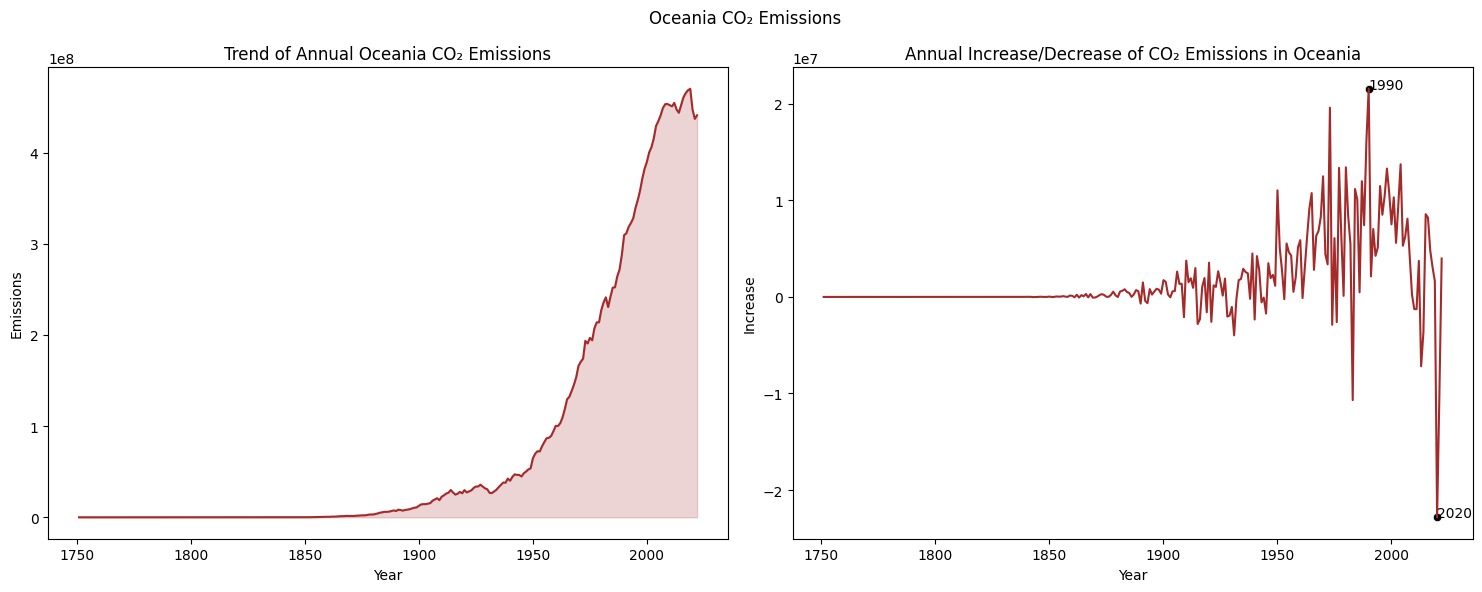

In [43]:
plt.figure(figsize=(15,6))
plt.suptitle('Oceania CO₂ Emissions')

plt.subplot(1,2,1)
plt.title('Trend of Annual Oceania CO₂ Emissions')
sns.lineplot(df_Oceania,x='Year',y='Emissions', color='brown')
for line in plt.gca().lines:
    plt.fill_between(line.get_xdata(),line.get_ydata(),alpha=0.2,color='brown')

plt.subplot(1,2,2)
plt.title('Annual Increase/Decrease of CO₂ Emissions in Oceania')
sns.lineplot(df_Oceania,x='Year',y='Increase',color='brown')
sns.scatterplot(Oc_top_bot,x='Year',y='Increase',color='black')
for x,y,label in zip(Oc_top_bot['Year'],Oc_top_bot['Increase'],Oc_top_bot['Year']):
    plt.annotate(label,(x,y),textcoords='offset points',xytext=(0,0))

plt.tight_layout()
plt.show()

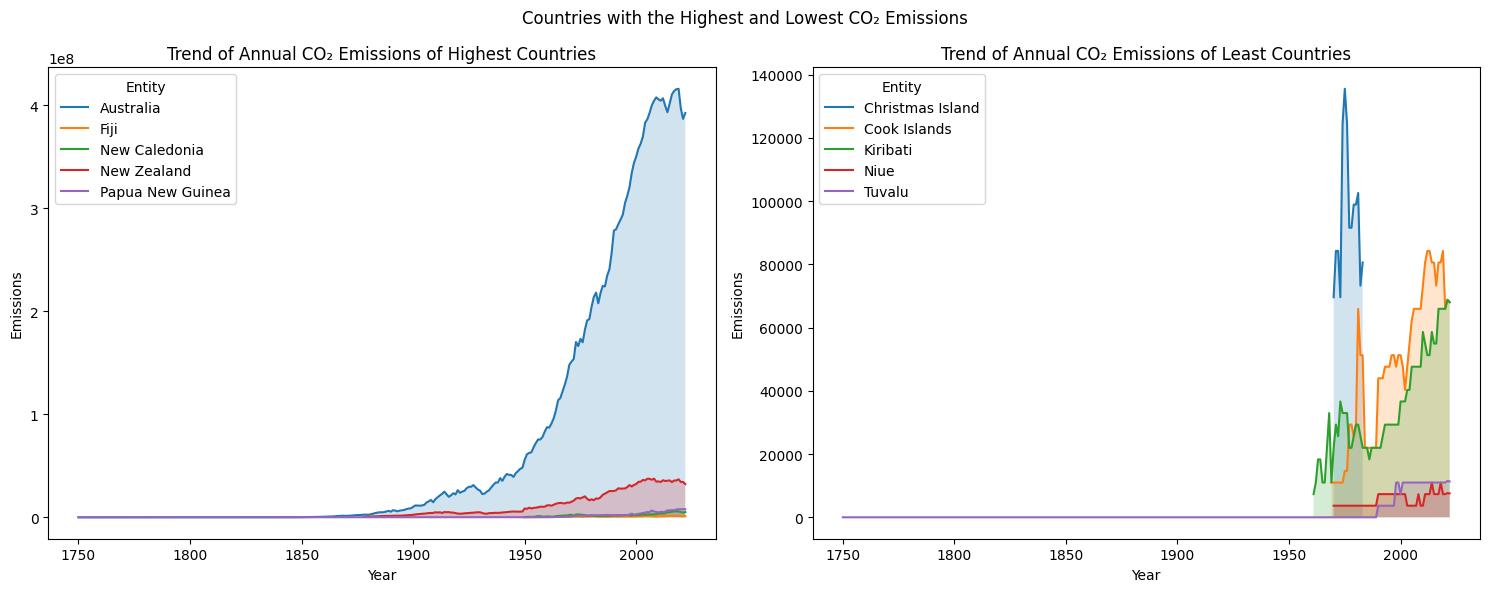

In [44]:
plt.figure(figsize=(15,6))
plt.suptitle('Countries with the Highest and Lowest CO₂ Emissions')

plt.subplot(1,2,1)
plt.title('Trend of Annual CO₂ Emissions of Highest Countries')
sns.lineplot(df_OcMax5,x='Year',y='Emissions',hue='Entity')
for line in plt.gca().lines:
    plt.fill_between(line.get_xdata(),line.get_ydata(),alpha=0.2)

plt.subplot(1,2,2)
plt.title('Trend of Annual CO₂ Emissions of Least Countries')
sns.lineplot(df_OcMin5,x='Year',y='Emissions',hue='Entity')
for line in plt.gca().lines:
    plt.fill_between(line.get_xdata(),line.get_ydata(),alpha=0.2)

plt.tight_layout()
plt.show()